In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
round=3
num_iterations = 3
num_mixture = 3
mixture_weight = [1/3] * num_mixture
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T
data

array([[ 1,  2],
       [ 3,  3],
       [ 2,  2],
       [ 8,  8],
       [ 6,  6],
       [ 7,  7],
       [-3, -3],
       [-2, -4],
       [-7, -7]])

In [3]:
def e_step():
    w=[]  #E-step
    for i in range(num_iterations):
        w.append(stats.multivariate_normal.pdf(data,mean_params[i],cov_params[i]) * mixture_weight[i])
    w=np.array(w)
    sum=np.sum(w,axis=0)
    for i in range(num_iterations):
        w[i]/=sum
    return w

def m_step(w):
    for i in range(num_iterations):#update weight
        mixture_weight[i]=np.sum(w[i])/len(data)
        
        mean_params[i]=np.dot(w[i],data)/np.sum(w[i])
        
        diff = data - mean_params[i]
        cov_params[i] = np.dot((w[i][:, np.newaxis] * diff).T, diff) / np.sum(w[i])
        cov_params[i][0,1]=0
        cov_params[i][1,0]=0
        
def show_process(round):
    print("round",round)
    print("weight")
    print(mixture_weight)
    print("mean")
    print(mean_params)
    print("cov_params")
    print(cov_params)


def plot():
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:,0],data[:,1])
    for j in range(num_iterations):
      x = np.linspace(mean_params[j][0] - 3 * np.sqrt(cov_params[j][0][0]), mean_params[j][0] + 3 * np.sqrt(cov_params[j][0][0]), 100)
      y = np.linspace(mean_params[j][1] - 3 * np.sqrt(cov_params[j][1][1]), mean_params[j][1] + 3 * np.sqrt(cov_params[j][1][1]), 100)
      X, Y = np.meshgrid(x, y)
      pos = np.empty(X.shape + (2,))
      pos[:, :, 0] = X; pos[:, :, 1] = Y
      plt.contour(X, Y, stats.multivariate_normal.pdf(pos, mean_params[j], cov_params[j]))
    plt.grid(True)
    plt.show()

T1
------------------------------------------------
round 1
weight
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
mean
[[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
cov_params
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


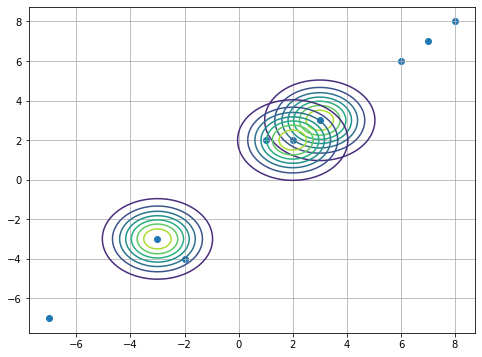

------------------------------------------------
------------------------------------------------
round 2
weight
[0.45757241940119386, 0.20909424706571342, 0.33333333353309275]
mean
[[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
cov_params
[[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]


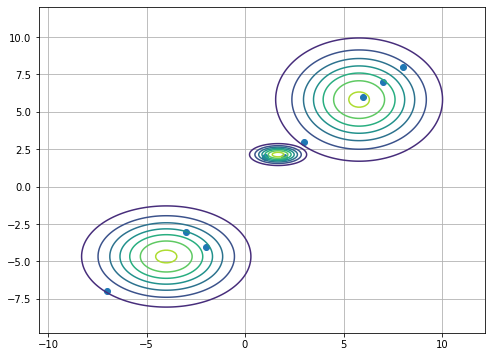

------------------------------------------------
------------------------------------------------
round 3
weight
[0.40711618315944753, 0.25954960846072456, 0.3333342083798279]
mean
[[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
cov_params
[[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]


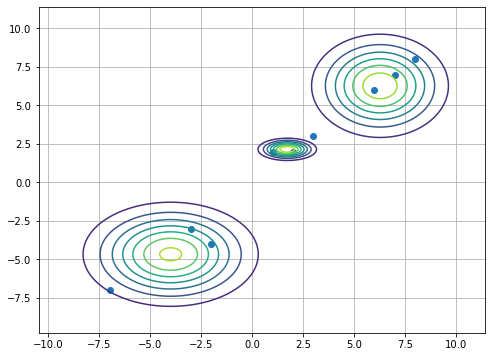

------------------------------------------------
------------------------------------------------
round 4
weight
[0.3607090863887185, 0.30595677269265115, 0.33333414091863034]
mean
[[ 6.6962644   6.69629468]
 [ 1.91071238  2.27383436]
 [-3.99998673 -4.6666501 ]]
cov_params
[[[1.73961067 0.        ]
  [0.         1.73929602]]

 [[0.62898406 0.        ]
  [0.         0.1988491 ]]

 [[4.66672942 0.        ]
  [0.         2.88899545]]]


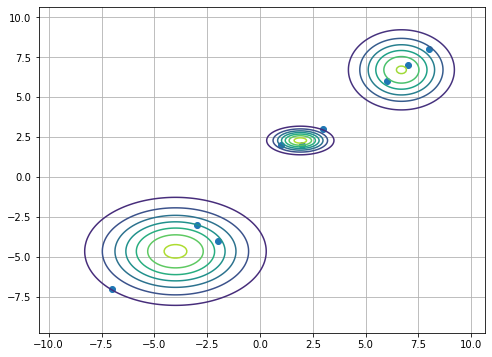

------------------------------------------------


In [4]:
print("T1")
for i in range(num_iterations+1):
    print("------------------------------------------------")
    show_process(i+1)
    plot()
    m_step(e_step())
    print("------------------------------------------------")

In [ ]:
def log_like():
    result=[]
    for i in range(num_iterations):
        